# cut lines

For other more classic low-dimensional problems - particularly with nonlinear regression - one can additionally reason out an appropriate nonlinearity using domain knowledge from physics and economics via so-called *differential equations*.

# Nonlinear regression examples

#### <span style="color:#a50e3e;">Example 1. </span> The linear case

In [ ]:
# the trivial linear feature transformation
def feature_transforms(x):
    return x

Below we show an implementation of this feature transformation and associated model.

In [31]:
# our nonlinearity, known as a feature transformation
def feature_transforms(x,w):
    # calculate feature transform
    f = np.tanh(w[0] + np.dot(x.T,w[1:])).T
    return f

Below implement both feature transformations in a single `Python` function, the `model` function.

In [36]:
def feature_transforms(x):
    # calculate feature transform
    f = np.array([(x.flatten()**d) for d in range(1,3)])   
    return f

# Nonlinear two-class classification examples

This is a rather trivial feature transformation to implement in `Python` - as we do below.  Notice this is an *unparameterized* feature transformation.

In [5]:
# the trivial linear feature transformation
def feature_transforms(x):      
    return x

But first we need to implement our feature transformations and `model` - which we do below.  Notice how this is precisely the same feature transformation and `model` used in Example 5 of the previous Section.

In [8]:
# our quadratic feature transformation
def feature_transforms(x):
    # calculate feature transform
    f = np.array([(x.flatten()**d) for d in range(1,3)])   
    return f

We write out each feature transformation, the prediction function, and softmax cost in `Python` cell below.  Here we will not normalize, as doing so would mean altering the distribution of the data enough so that the pure elliptical feature transformations we have used (i.e., we have not use any cross terms like $x_1x_2$) would no longer be appropriate.  

In [11]:
# a elliptical feature transformation
def feature_transforms(x):
    # calculate feature transform
    f = x**2  
    return f

#### <span style="color:#a50e3e;">Example 4. </span>  Using a parameterized sinusoid to classify stripes of data

In this example we look to perform two-class classification on the dataset shown below - from the regression perspective (left panel) and separator perspective (right panel).  This interesting looking dataset consists of two classes that are separated into consecutive diagonal stripes.

<IPython.core.display.Javascript object>


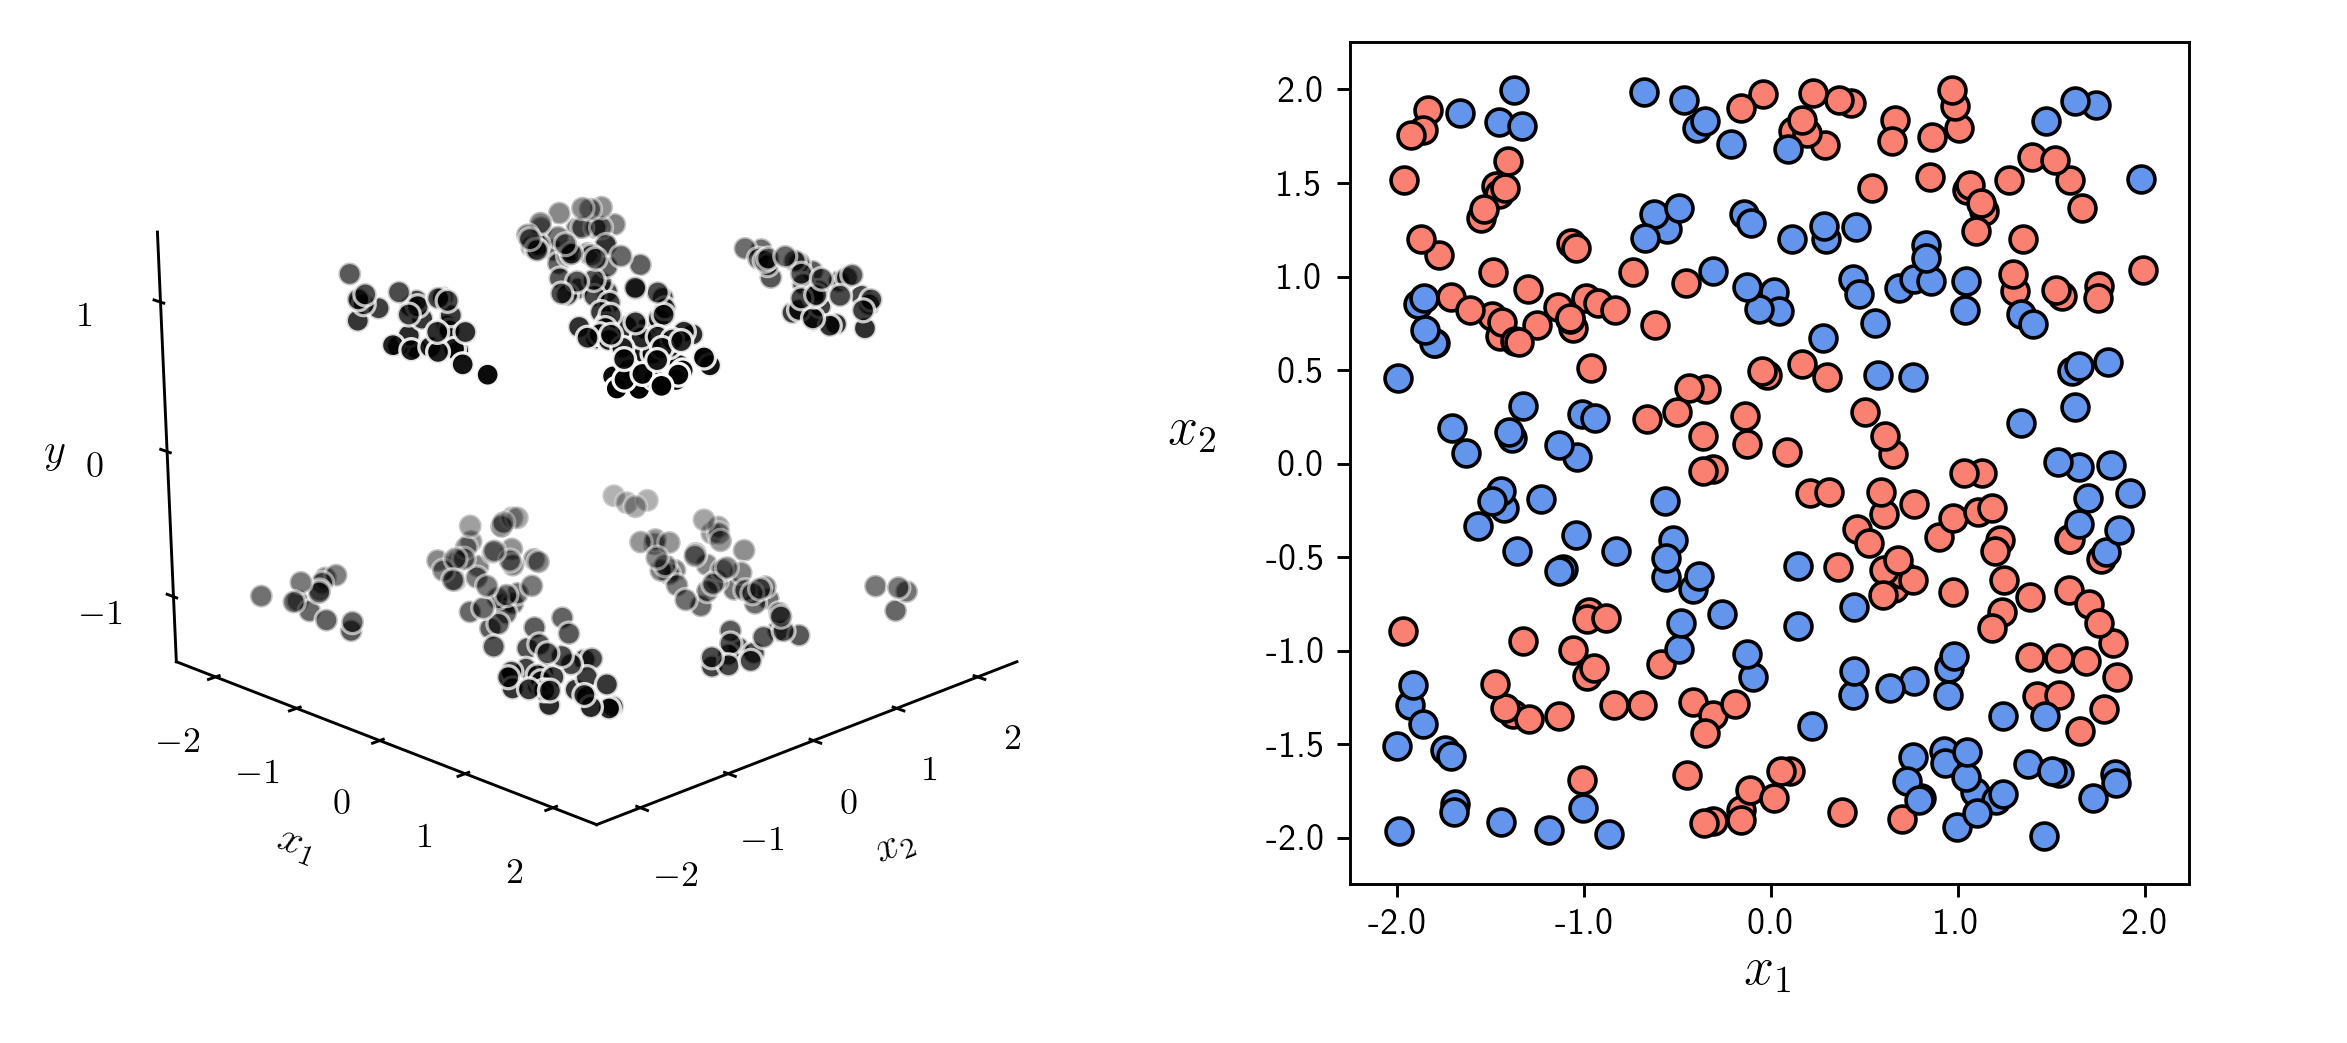

In [12]:
## This code cell will not be shown in the HTML version of this notebook
# create instance of linear regression demo, used below and in the next examples
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + 'diagonal_stripes.csv')

# load in input/output data
x = demo.x.T
y = demo.y[np.newaxis,:]

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
demo.plot_data();

Looking at this dataset from the regression perspective (left panel above) it looks like a properly designed sinusoid of the input could potentially fit it well, and hence provide the proper sort of nonlinear boundary we need.  So we will employ a `model` consisting of completely *parameterized* sine function or *feature transformation* of the input

\begin{equation}
f\left(\mathbf{x},\mathbf{w}\right) = \text{sin}\left(w_0 + x_1w_1 + x_2w_2\right).
\end{equation}

We can then take as our model a linear combination of this nonlinear feature transformation as

\begin{equation}
\text{model}\left(\mathbf{x},\mathbf{w}_{\!}\right) = w_3 + f\left(\mathbf{x},\mathbf{w}\right)w_{4\,}.
\end{equation}

Note here we are using the notation $\mathbf{w}$ rather loosely to represent whatever weights are present in the respective formula - for example in the feature transformation $\mathbf{w}$ consists of $w_0$, $w_1$, and $w_2$, whereas with the `model` it contains these weights as well as $w_3$ and $w_4$.

We implement this parameterized feature transformation in `Python` below.

In [13]:
# our nonlinearity, known as a feature transformation
def feature_transforms(x,w):        
    f = np.sin(w[0] + np.dot((x).T,w[1:])).T
    return f

With our feature transformation implemented we now tune all weights of the model by taking 1000 gradient descent steps, using standard normalization on the input.

Now we illustrate the nonlinear step function (left panel) and corresponding decision boundary (right panel) created by taking the weights associated with the lowest cost value of our gradient descent run above.  We can see that - with properly tuned weights - we achieve perfect classification on this dataset.  Note in this particular instance we had to run gradient descent a number of times to produce these results. 

<IPython.core.display.Javascript object>


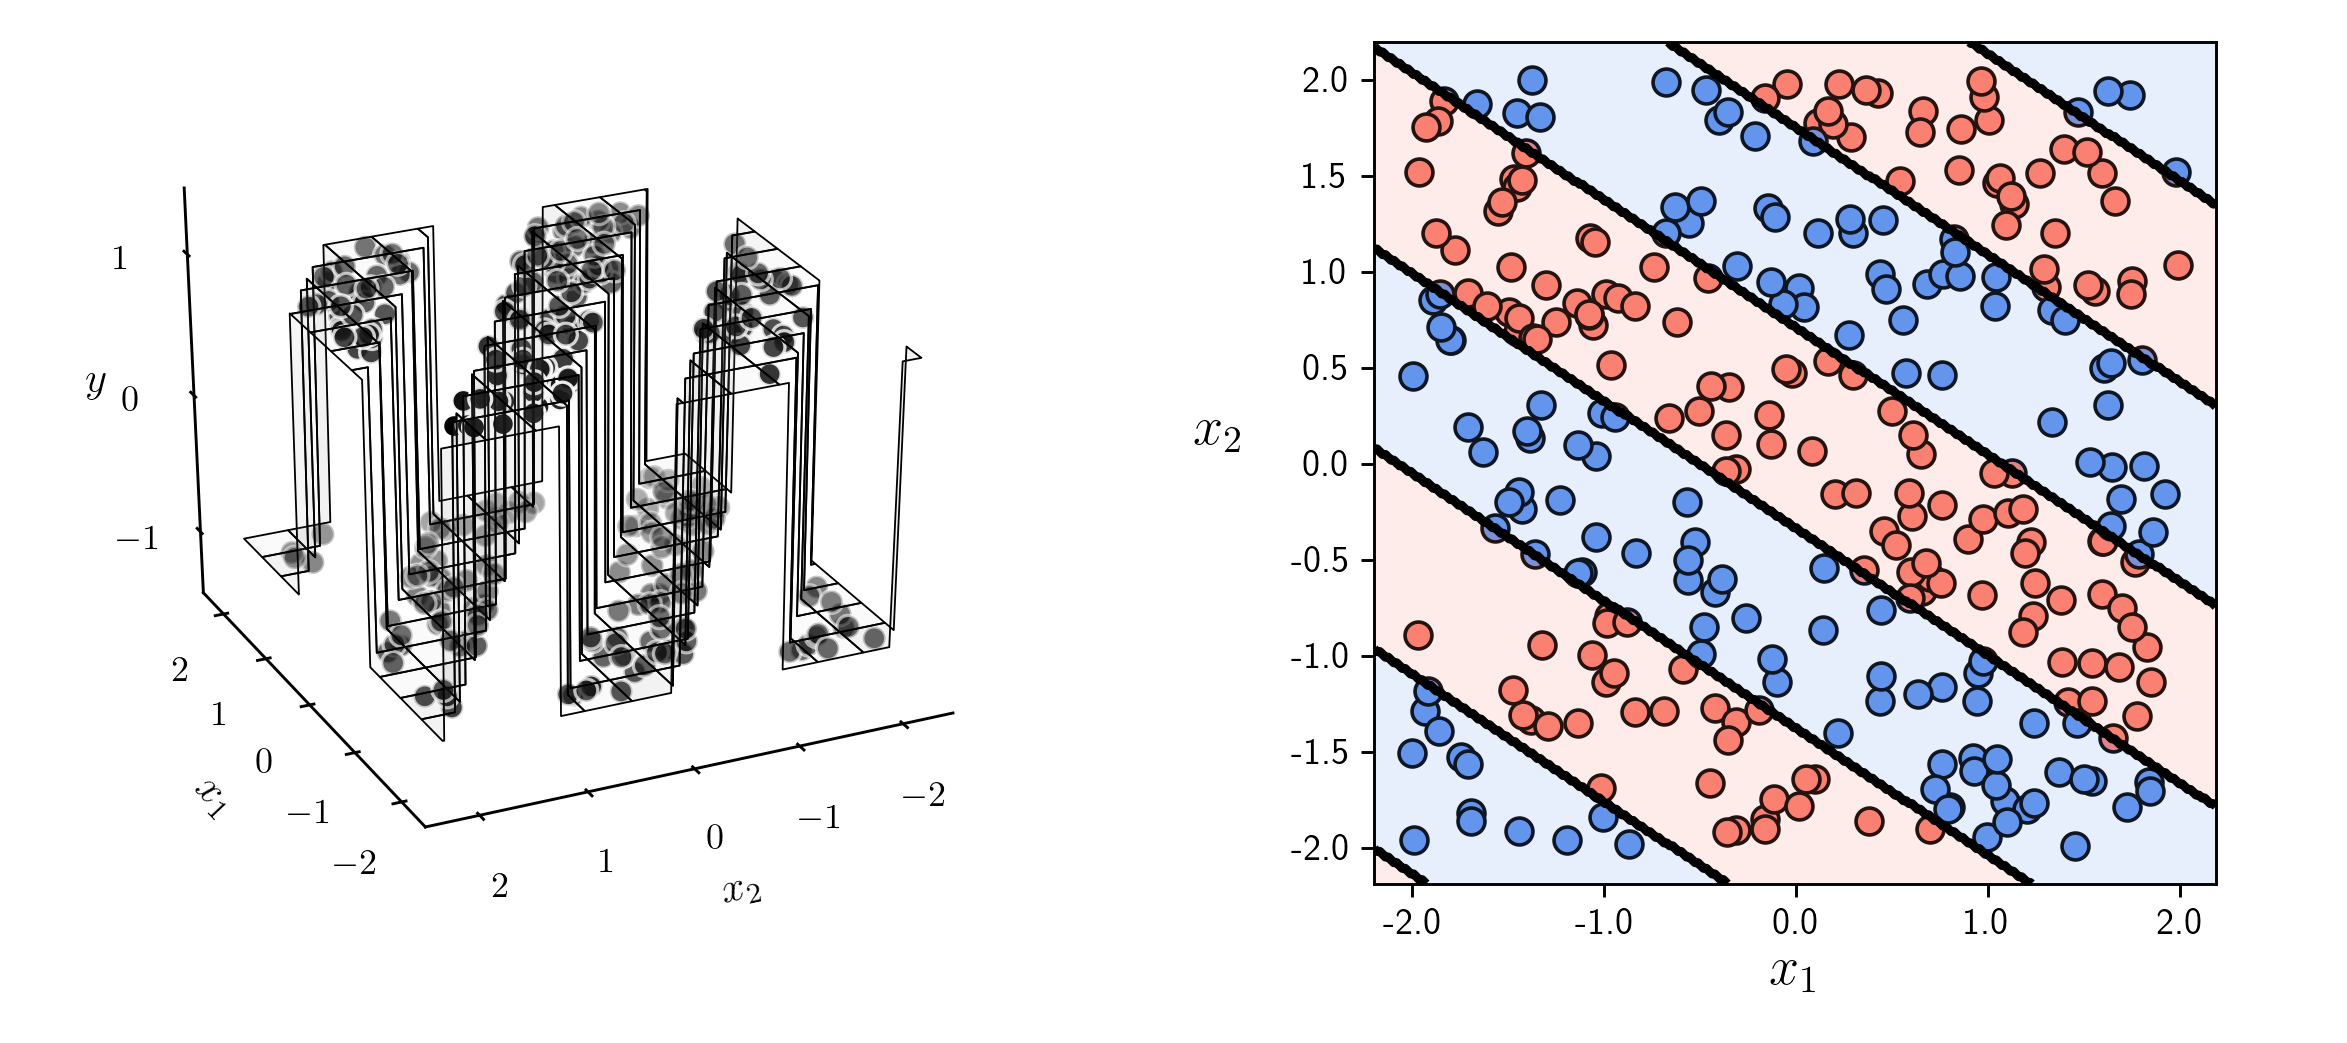

In [19]:
## This code cell will not be shown in the HTML version of this notebook
# parameters for our two runs of gradient descent
scale = 2
w = [scale*np.random.randn(3,1),scale*np.random.randn(2,1)]
max_its = 1000; alpha_choice = 10**(-1)

# run on normalized data
run = nonlib.basic_runner.Setup(x,y,feature_transforms,'softmax',normalize = 'standard')
run.fit(w=w,alpha_choice = alpha_choice,max_its = max_its)

# illustrate results
ind = np.argmin(run.cost_history)
w_best = run.weight_history[ind]
demo.static_N2_simple(w_best,run,view = [30,155])

# Multi-class nonlinear

In `Python` we can implement this in a `feature_transforms` as follows.

In [22]:
# a elliptical feature transformation
def feature_transforms(x):
    # calculate feature transform
    f = []
    for i in range(0,D):
        for j in range(0,D-i):
            if i > 0 or j > 0:
                term = (x[0,:]**i)*((x[1,:])**j)
                f.append(term)
    return np.array(f)

We will standard normalize our input prior to optimization, hence with each feature transformation we treat  $x_1 \longleftarrow \frac{x_1 -  \mu_1}{\sigma_1}$ and $x_2 \longleftarrow \frac{x_2 -  \mu_2}{\sigma_2}$ where $\mu_1$ / $\sigma_1$ and $\mu_2$ / $\sigma_2$ are the means / standard deviations of the data along the $x_1$ and $x_2$ input dimensions.  Below we solve the $C$ two class problems (via minimizing the softmax cost) using the above feature transformation using $1,500$ gradient descent steps, $\alpha = 1$ for each run, and the same random initialization for each run. 

# Nonlinear unsupervised learning

#### <span style="color:#a50e3e;">Example 1. </span> Linear PCA using the autoencoder 

Here we re-enact an experiment showing how to use the standard linear autoencoder first shown in Section 11.4, employing the organizatinoal style detailed above, to find the best one dimensional subspace for the two dimensional dataset shown below.

<IPython.core.display.Javascript object>


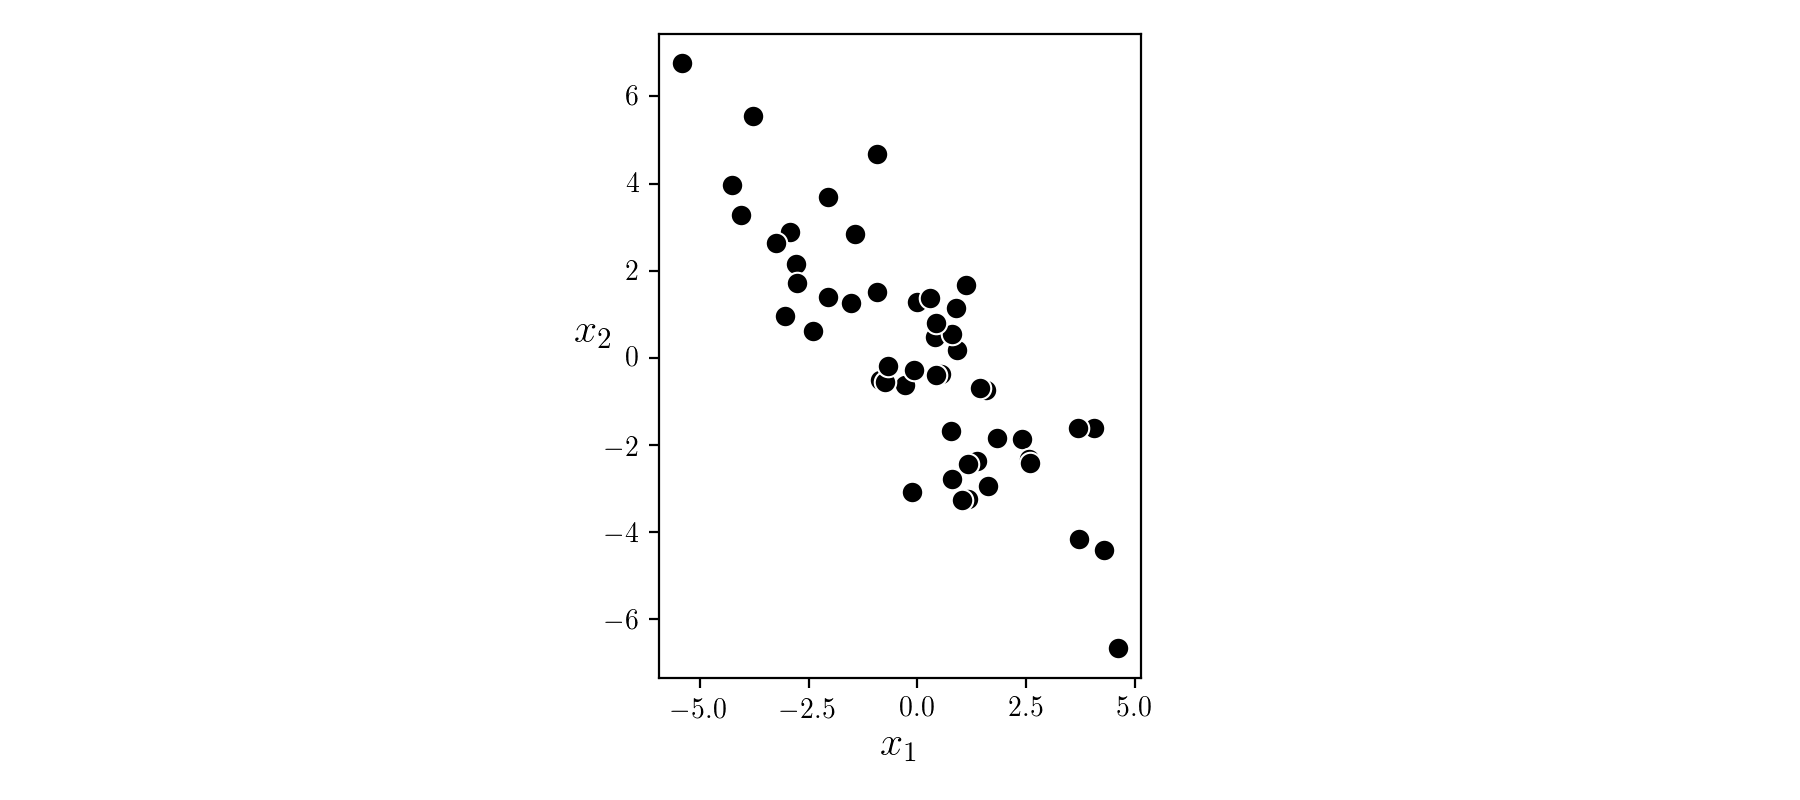

In [5]:
## This code cell will not be shown in the HTML version of this notebook
# load in a dataset to learn a PCA basis for via the autoencoder
X = np.loadtxt(datapath + '2d_span_data_centered.csv',delimiter=',')

# scatter dataset
fig = plt.figure(figsize = (9,4))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0],aspect = 'equal'); 
ax.set_xlabel(r'$x_1$',fontsize = 15);ax.set_ylabel(r'$x_2$',fontsize = 15,rotation = 0);
ax.scatter(X[0,:],X[1,:],c = 'k',s = 60,linewidth = 0.75,edgecolor = 'w');

In visually examining this dataset it does indeed look like it could be reasonably represented using a *linear* manifold or subspace (which in this case is clearly a line).  Because of this we can use our linear `encoder` and `decoder` functions defined above.

Using gradient descent we then minimize the autoencoder cost, finding the best one dimensional subspace for this two-dimensional dataset.

In [6]:
## This code cell will not be shown in the HTML version of this notebook
# tune the autoencoder via gradient descent
g = autoencoder; alpha_choice = 10**(-2); max_its = 1000; C = 0.1*np.random.randn(2,1);
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,C)

Shown below in the top row is (left panel) the original data and the principal component recovered (shown as a red arrow), the encoded version (middle panel) and decoded version (right panel) of the input data along with the subspace spanned by the recovered basis vector.  In the bottom row we show the manifold recovered - as a black line with red outline for visualization purposes - and illustrate how points in the space are attracted to the recovered manifold as a vector field with arrows colored according to their distance to the linear subspace.

<IPython.core.display.Javascript object>


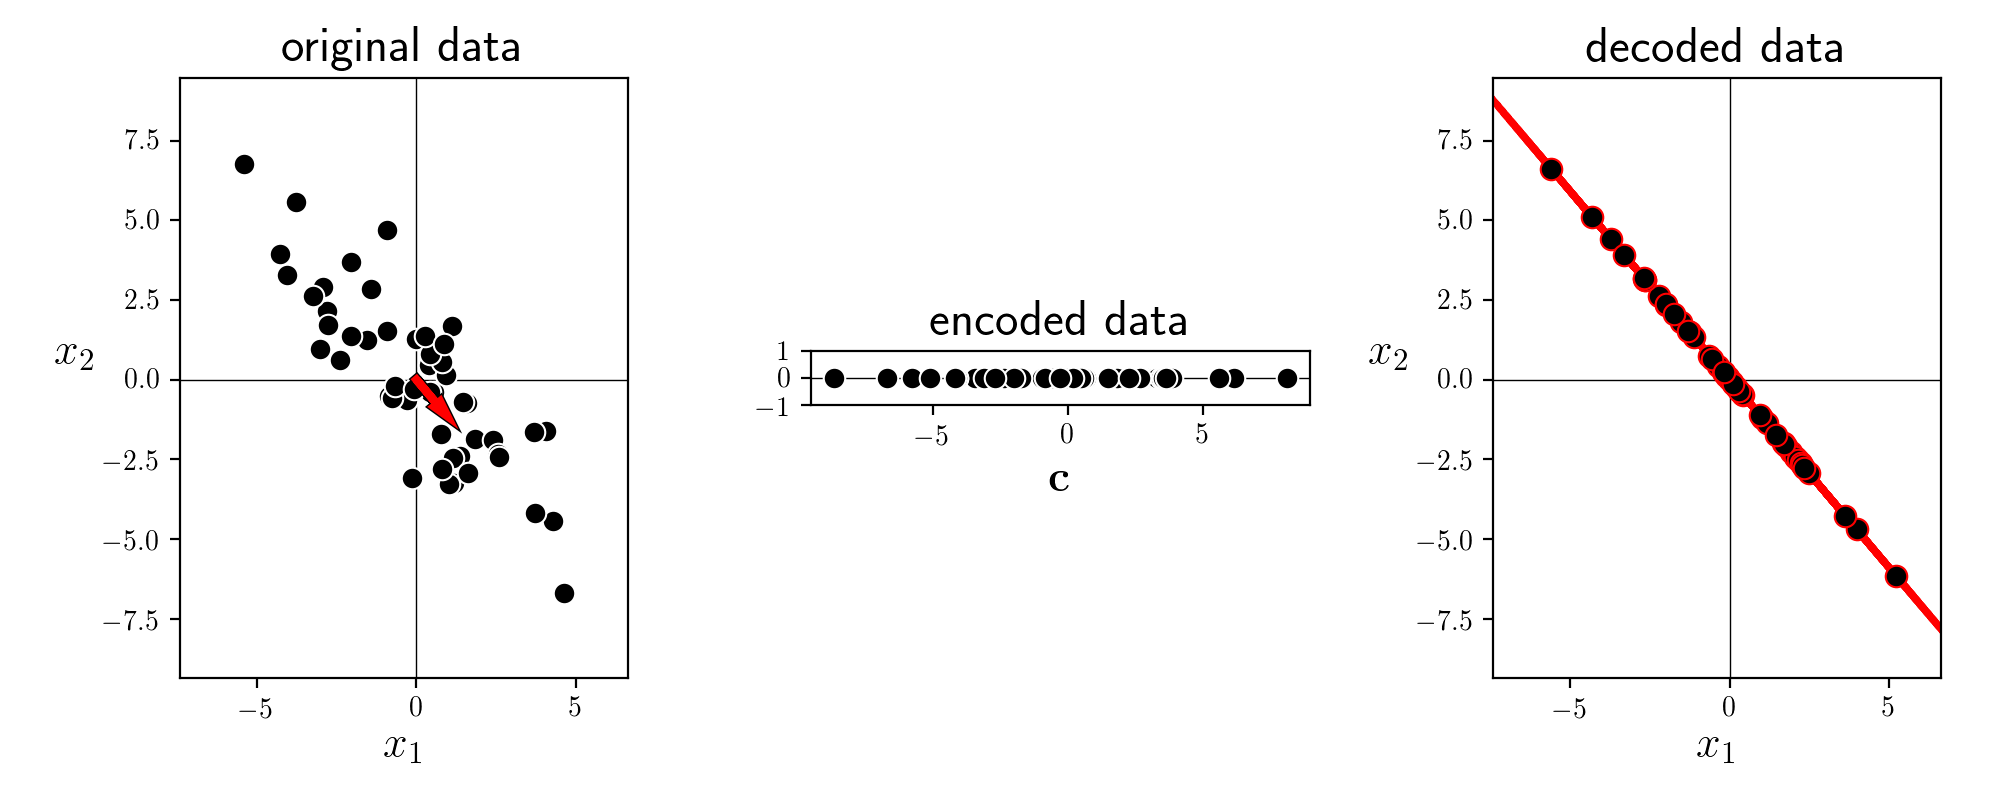

<IPython.core.display.Javascript object>


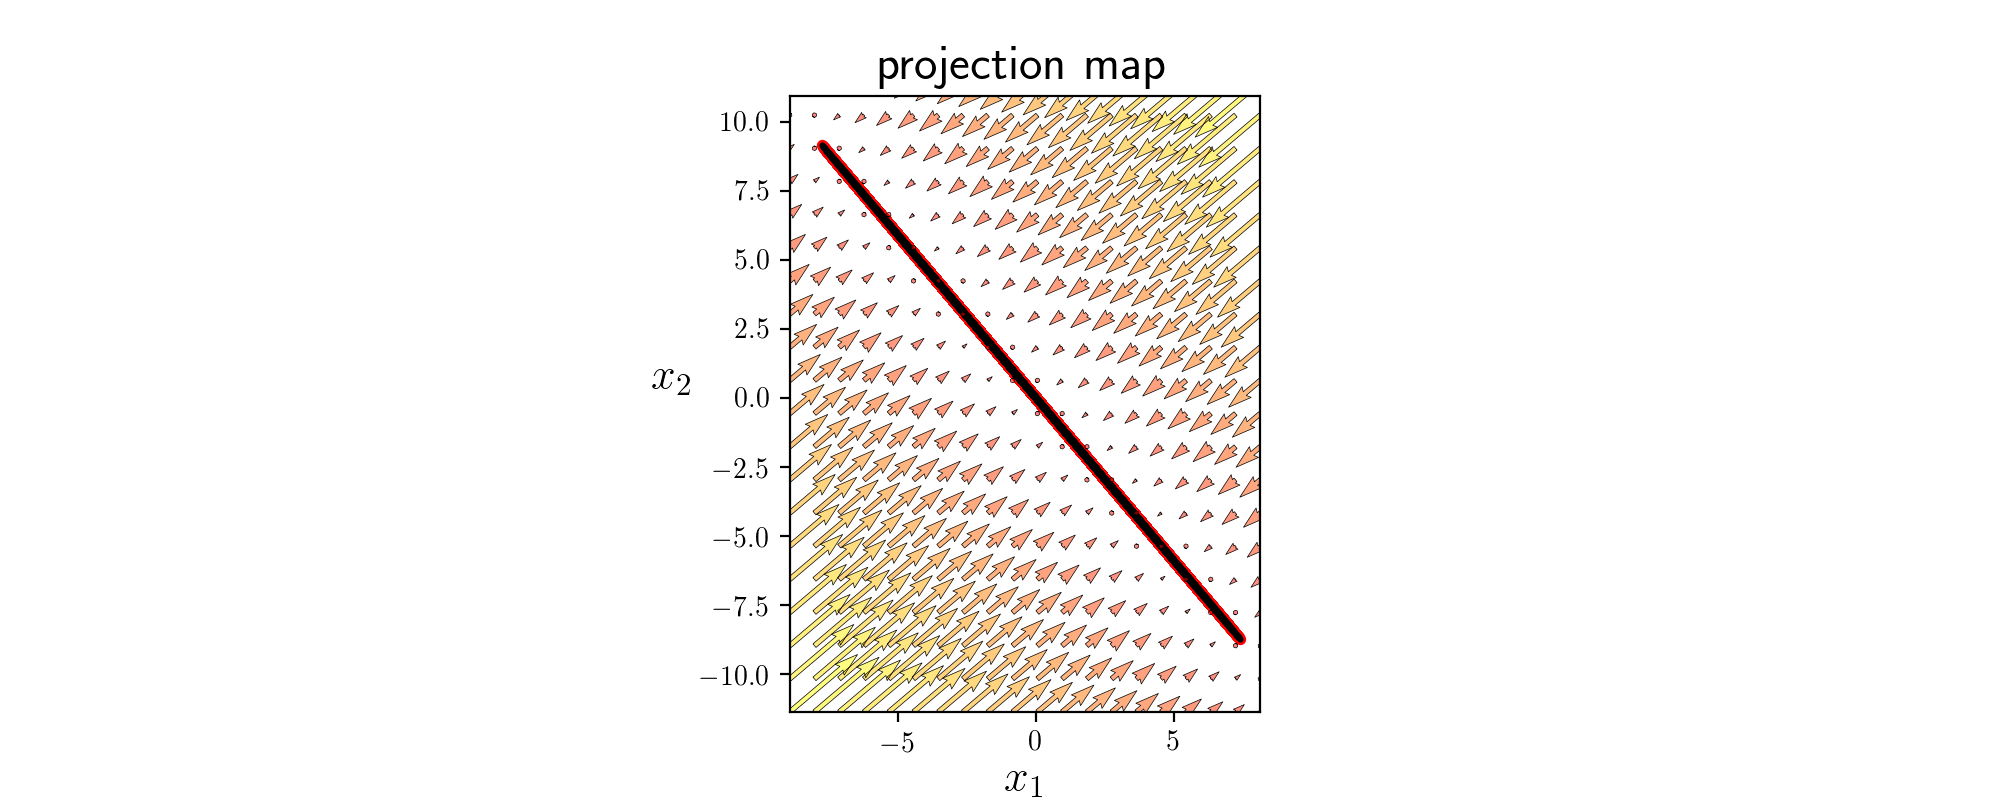

In [7]:
## This code cell will not be shown in the HTML version of this notebook
# plot results
unlib.autoencoder_demos.show_encode_decode(X,cost_history,weight_history,show_pc = True,scale = 150,encode_label = r'$\mathbf{c}$',projmap = True)

---

This is our nonlinear encoder which we implement below along with our custom ``arctan`` function.

In [11]:
def my_arctan(x1,x2):
    v = x2/x1
    if x1 > 0:
        return np.arctan(v)
    elif x1 < 0 and x2 >= 0:
        return np.arctan(v) + np.pi
    elif x1 < 0 and x2 < 0:
        return np.arctan(v) - np.pi
    elif x1==0 and x2 > 0:
        return np.pi*0.5
    elif x1==0 and x2 < 0:
        return -np.pi*0.5  
    
def encoder(x,w):
    a = x - w     
    b = []
    for i in range(a.shape[1]):
        b.append(my_arctan(a[0][i],a[1][i]))
    b = np.array(b)[np.newaxis,:]
    return b      

The ``decoder`` function below implements this nonlinear decoding process. 

In [12]:
def decoder(v,w):
    a = w[:,0][:,np.newaxis]*np.vstack((np.cos(v),np.sin(v))) + w[:,1][:,np.newaxis]
    return a

# Nonlinear unsupervised learning examples

#### <span style="color:#a50e3e;">Example 3. </span> Finding a spiral subspace via the autoencoder

<IPython.core.display.Javascript object>


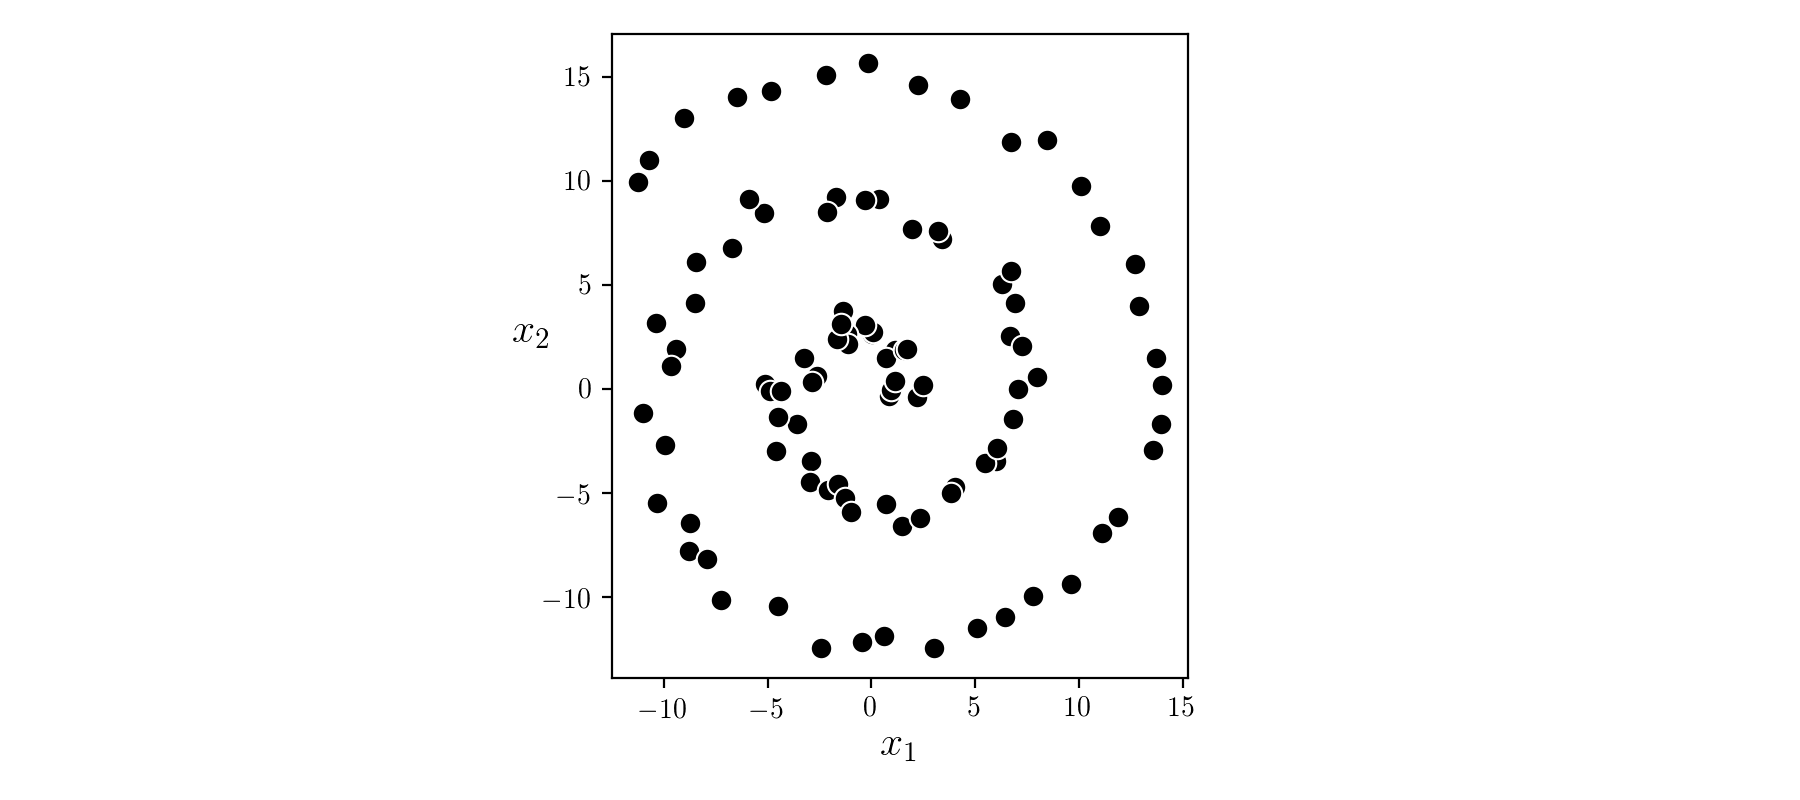

In [685]:
# generate data
a = 1; b = 1;
num_pts = 100
theta = np.linspace(0,15,num_pts)[np.newaxis,:]
r = a + b*theta 
X = np.vstack((r*np.cos(theta),r*np.sin(theta))) 
noise = 0.6*np.random.randn(2,num_pts)
X += noise

# normalizer = standard_normalizer(X_orig)
# X = normalizer(X_orig)

# scatter dataset
fig = plt.figure(figsize = (9,4))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0],aspect = 'equal'); 
ax.set_xlabel(r'$x_1$',fontsize = 15);ax.set_ylabel(r'$x_2$',fontsize = 15,rotation = 0);
ax.scatter(X[0,:],X[1,:],c = 'k',s = 60,linewidth = 0.75,edgecolor = 'w')

<IPython.core.display.Javascript object>


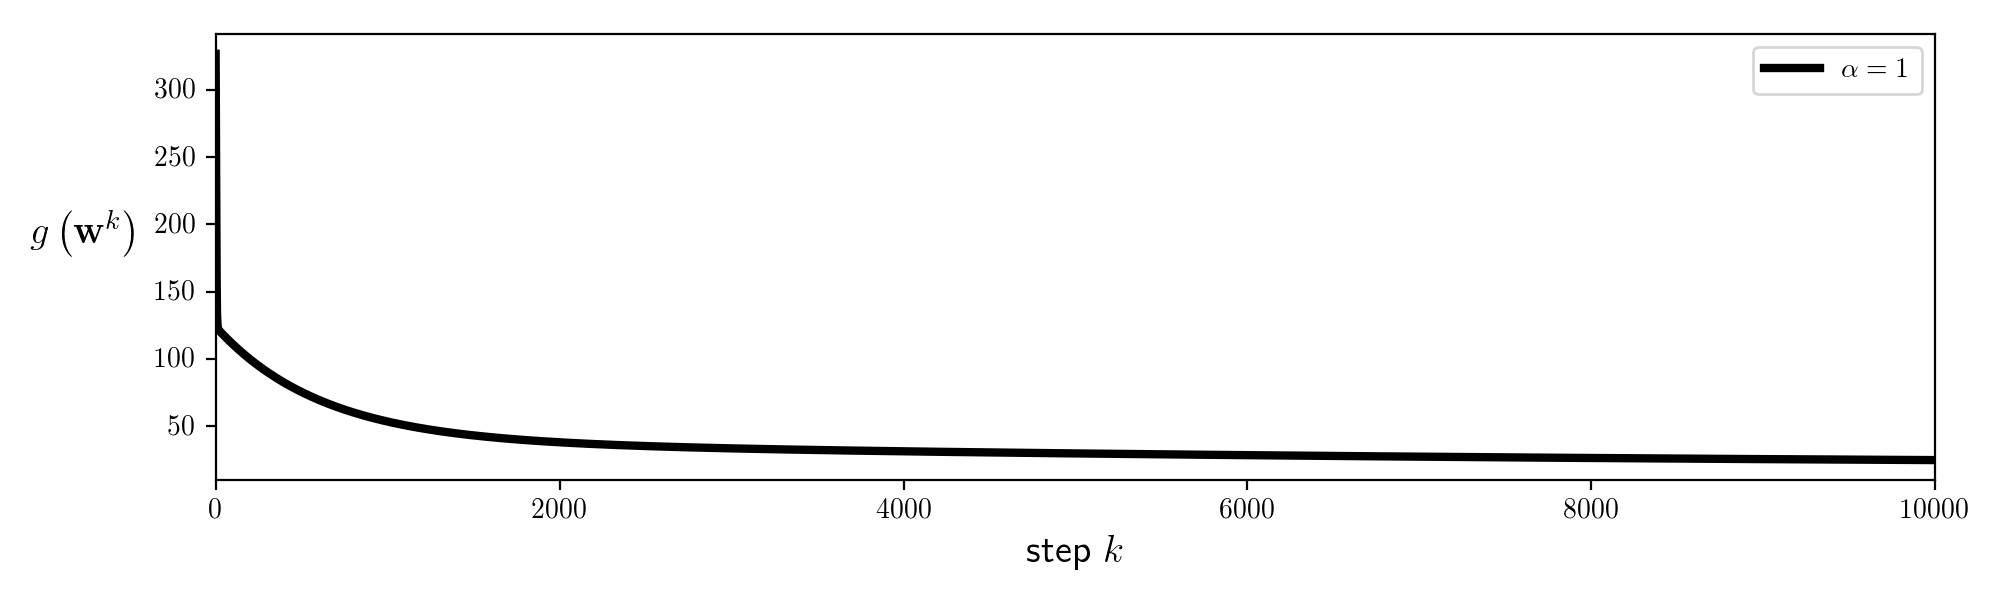

In [698]:
# an implementation of the least squares cost function for linear regression
def autoencoder(w):
    cost = np.sum((model(X,w) - X)**2)
    return cost/float(X.shape[1])

# compute linear combination of input point
def model(x,w):    
    # perform encoding 
    v = encoder(x,w[0])
    
    # perform decoding 
    a = decoder(v,w[1])
    return a
    
def encoder(x,w):
    v = w[0] + w[1]*(np.sum(x*x,axis = 0)**(0.5))[np.newaxis,:]
    return v

def decoder(v,w):
    a = np.vstack((np.cos(v),np.sin(v)))
    b = np.vstack((v,v))
    c = b*a*w   #[:,0][:,np.newaxis] + w[:,1][:,np.newaxis]
    return c

# setup the learning
scale = 1
# w = [scale*np.random.randn(2,1),scale*np.random.randn(2,1)];
w = [np.ones((2,1)),scale*np.random.randn(2,1)];

# tune pca least squares cost
g = autoencoder;

# tune pca least squares cost
alpha_choice = 10**(-5); max_its = 10000; 
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,w)

# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history],start = 0,points = False,labels = [r'$\alpha = 1$'])

<IPython.core.display.Javascript object>


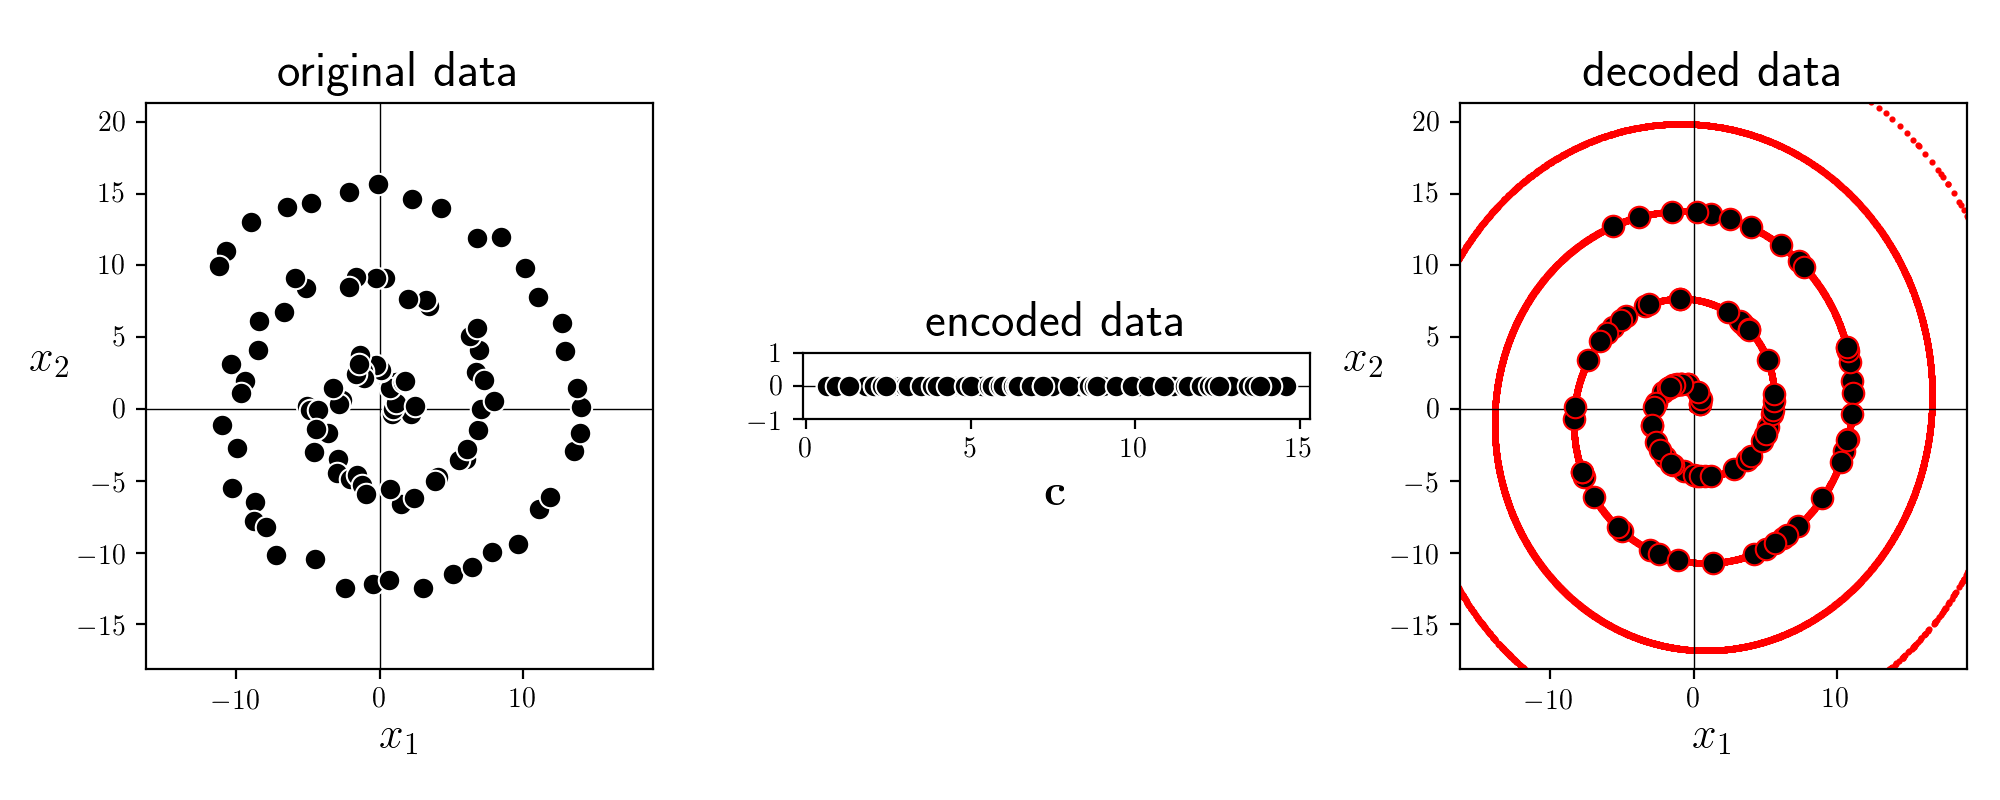

In [699]:
# plot results
unlib.autoencoder_demos.show_encode_decode(X,cost_history,weight_history,encoder=encoder,decoder=decoder,show_pc = False,scale = 75,encode_label = r'$\mathbf{c}$',projmap = False)

&copy; This material is not to be distributed, copied, or reused without written permission from the authors.